In [29]:
pip install matplotlib scikit-learn pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers
data_path = "monet2photo"  # Chemin après extraction
trainA_path = os.path.join(data_path, "trainA")  # Sous-dossier trainA
trainB_path = os.path.join(data_path, "trainB")  # Sous-dossier trainB

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Niveaux de gris
        img = img.resize((32, 32))  # Réduire la taille pour accélérer
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Concaténer les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

print(f"TrainA : {len(trainA_paths)} images chargées")
print(f"TrainB : {len(trainB_paths)} images chargées")


TrainA : 1072 images chargées
TrainB : 1500 images chargées


In [31]:
# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

# Extraire les coordonnées X et Y
x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]


In [33]:
# Vérification des chemins des images
print("Chemin de la première image :", all_paths[0])
print("Nombre total d'images :", len(all_paths))


Chemin de la première image : monet2photo\trainA\00001.jpg
Nombre total d'images : 100


In [34]:
# Vérification des coordonnées t-SNE
print("Coordonnées X :", x_coords[:5])
print("Coordonnées Y :", y_coords[:5])


Coordonnées X : [-1.8572323 -0.5202819 -1.2185398  3.1772773 -3.7216396]
Coordonnées Y : [-1.2582067  -0.22845367 -2.014969   -3.2252793  -2.9468093 ]


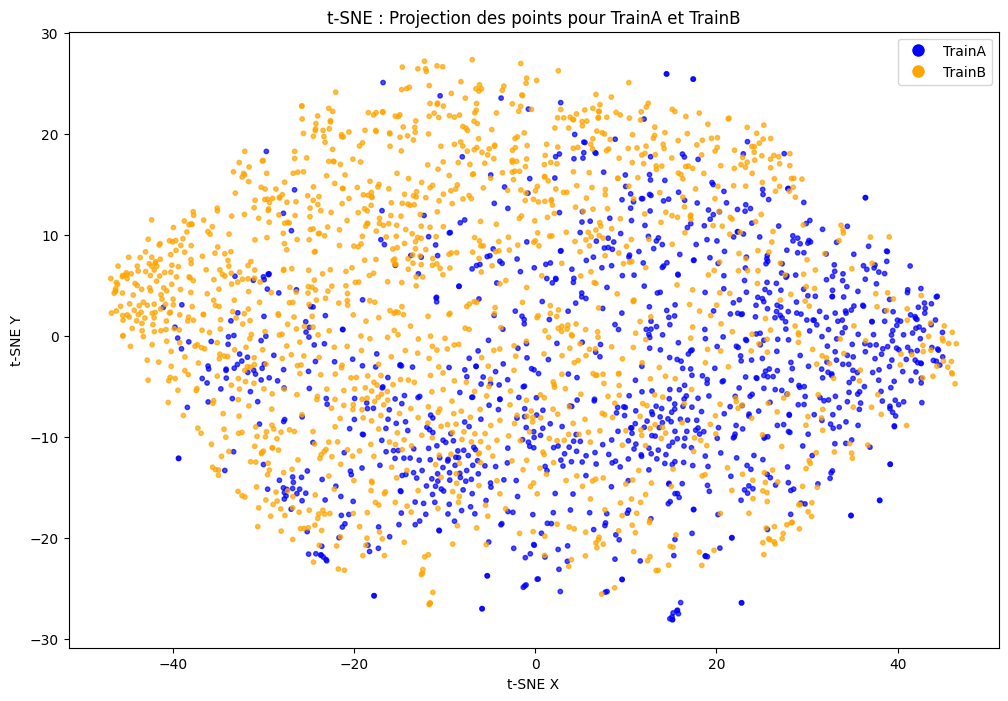

In [52]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images(image_folder, max_images=1500):
    image_vectors = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner
        image_vectors.append(np.array(img).flatten())
    return np.array(image_vectors)

# Charger les images de TrainA et TrainB
trainA_vectors = load_images(trainA_path)
trainB_vectors = load_images(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
labels = ['TrainA'] * len(trainA_vectors) + ['TrainB'] * len(trainB_vectors)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Créer le graphique avec les points colorés et la légende
fig, ax = plt.subplots(figsize=(12, 8))

# Afficher les points pour toutes les données
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.7, s=10, marker='o')

# Ajouter une légende
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='TrainA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='TrainB')
], loc='best')

# Configurer les axes et le titre
plt.title("t-SNE : Projection des points pour TrainA et TrainB")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.show()


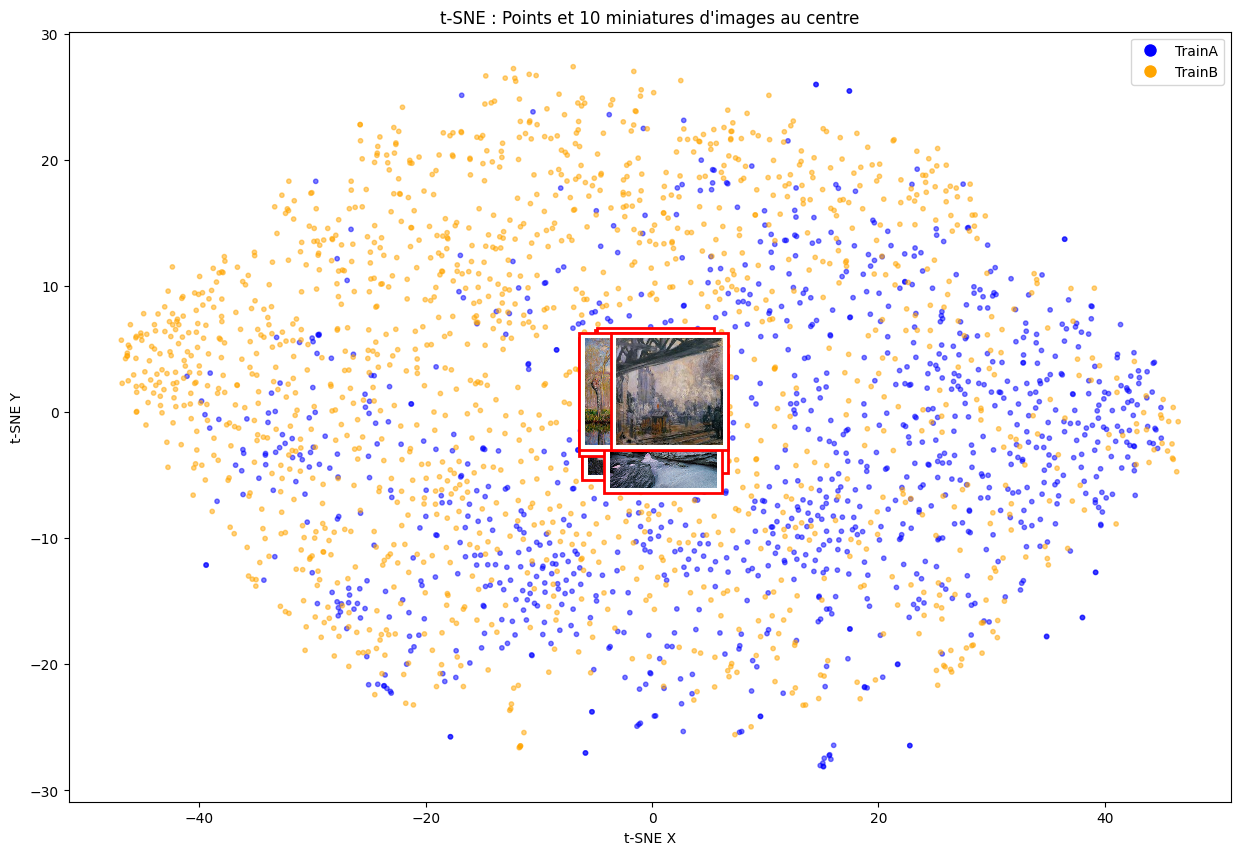

In [53]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Sélectionner les 10 images les plus proches du centre
distances = np.sqrt(x_coords**2 + y_coords**2)
center_indices = np.argsort(distances)[:10]  # Indices des 10 points les plus proches du centre

# Fonction pour ajouter des miniatures
def add_selected_images(ax, x, y, image_paths, indices, zoom=0.3):
    for idx in indices:
        img = Image.open(image_paths[idx])
        im = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(im, (x[idx], y[idx]), frameon=True, bboxprops=dict(edgecolor='red', lw=2))
        ax.add_artist(ab)

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 10))

# Afficher les points pour toutes les données
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.5, s=10, marker='o', label="Points t-SNE")

# Ajouter les miniatures pour 10 images près du centre
add_selected_images(ax, x_coords, y_coords, all_paths, center_indices, zoom=0.3)

# Ajouter une légende
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='TrainA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='TrainB')
], loc='best')

# Configurer les axes et le titre
plt.title("t-SNE : Points et 10 miniatures d'images au centre")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.show()

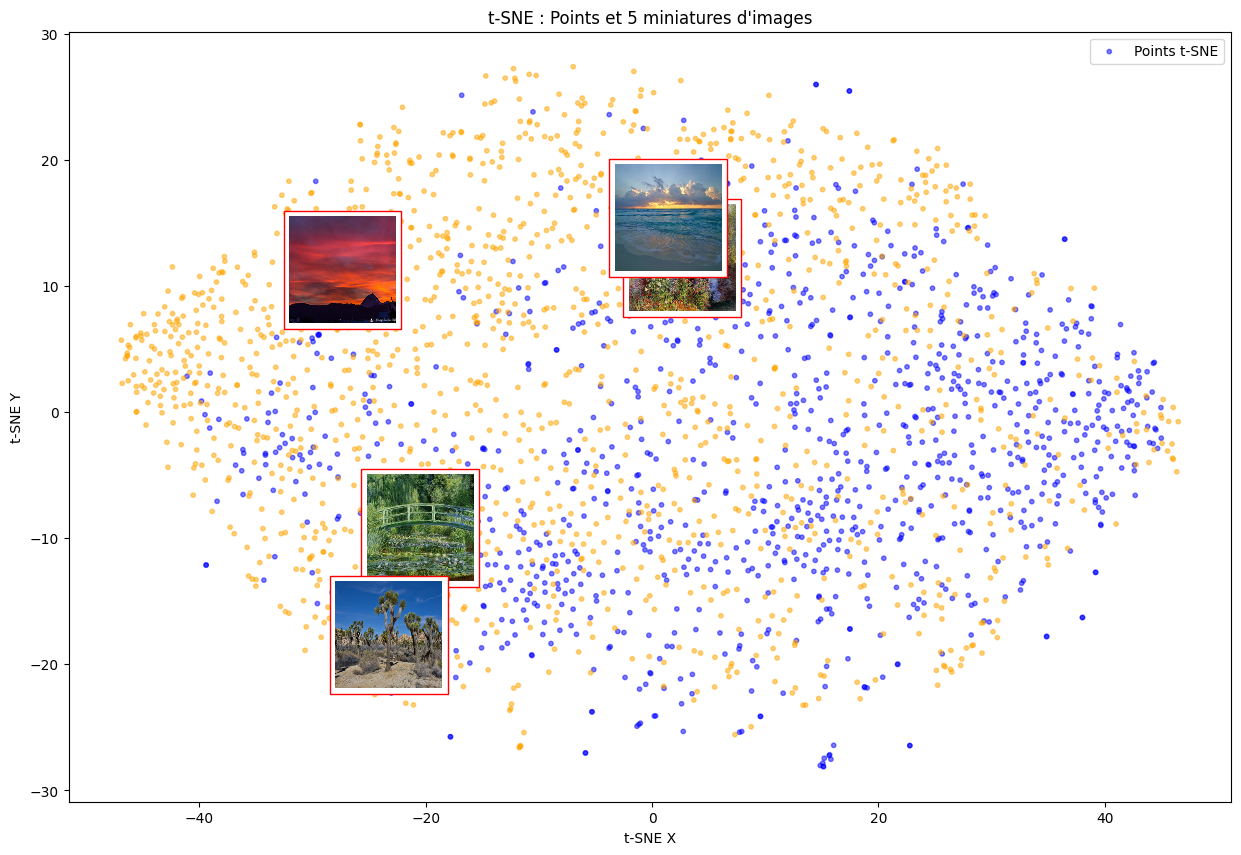

In [54]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Fonction pour ajouter des miniatures pour 5 images seulement
def add_selected_images(ax, x, y, image_paths, zoom=0.3, num_images=5):
    indices = np.linspace(0, len(x)-1, num_images, dtype=int)  # Sélectionner 5 indices équidistants
    for idx in indices:
        img = Image.open(image_paths[idx])
        im = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(im, (x[idx], y[idx]), frameon=True, bboxprops=dict(edgecolor='red'))
        ax.add_artist(ab)

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 10))

# Afficher les points pour toutes les données
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.5, s=10, marker='o', label="Points t-SNE")

# Ajouter les miniatures pour seulement 5 images
add_selected_images(ax, x_coords, y_coords, all_paths, zoom=0.3, num_images=5)

# Configurer les légendes et les axes
plt.title("t-SNE : Points et 5 miniatures d'images")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend()
plt.show()

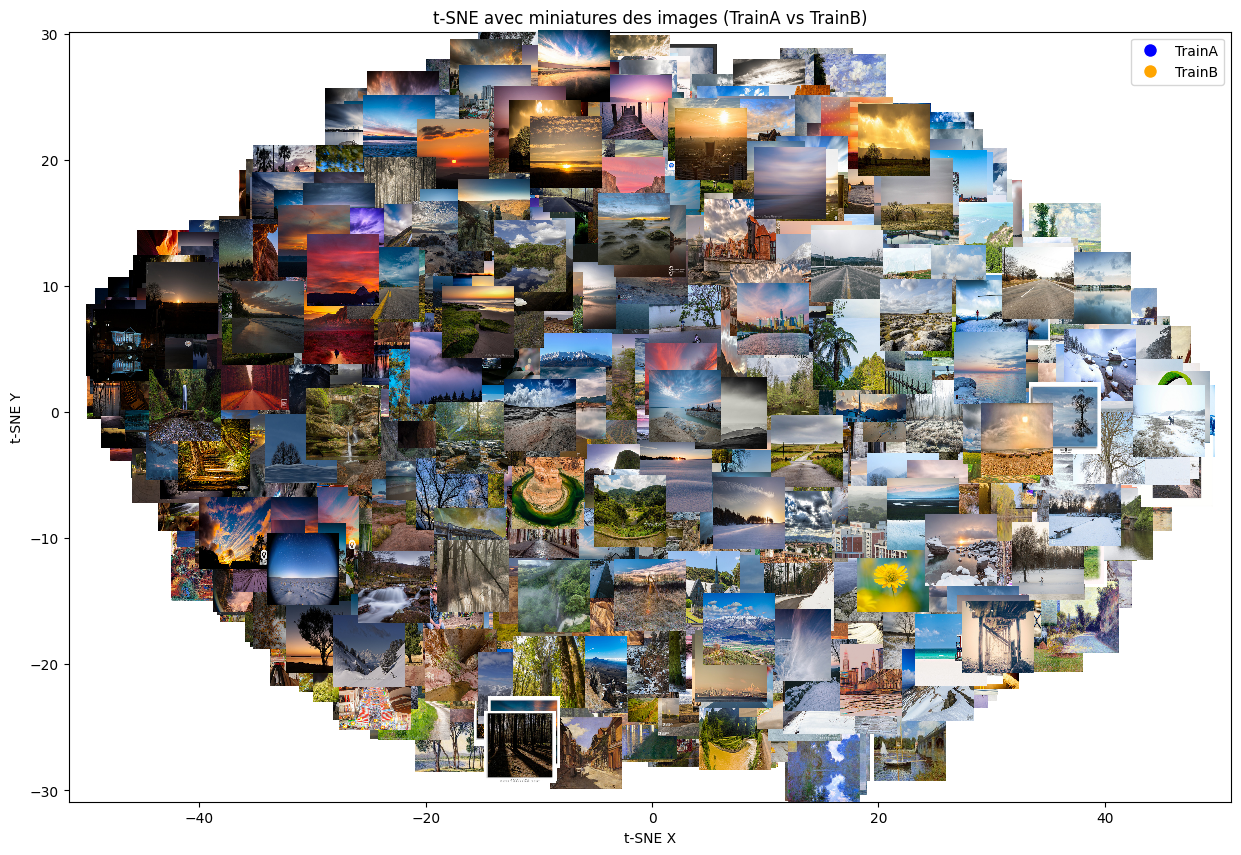

In [55]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner pour réduire la taille
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Fonction pour ajouter des miniatures d'images aux points t-SNE
def add_offset_images(ax, x, y, image_paths, zoom=0.2):  # Zoom ajusté pour des images plus petites
    for x0, y0, img_path in zip(x, y, image_paths):
        img = Image.open(img_path)
        im = OffsetImage(img, zoom=zoom)  # Zoom plus petit
        ab = AnnotationBbox(im, (x0, y0), frameon=False)
        ax.add_artist(ab)

# Créer le graphique t-SNE avec des points et des miniatures
fig, ax = plt.subplots(figsize=(15, 10))

# Afficher les points plus visibles
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.7, s=20, marker='o')  # Taille des points réduite avec s=20

# Ajouter les miniatures d'images avec un zoom plus petit
add_offset_images(ax, x_coords, y_coords, all_paths, zoom=0.2)

# Configurer les légendes et les axes
plt.title("t-SNE avec miniatures des images (TrainA vs TrainB)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='TrainA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='TrainB')
], loc='best')

plt.show()


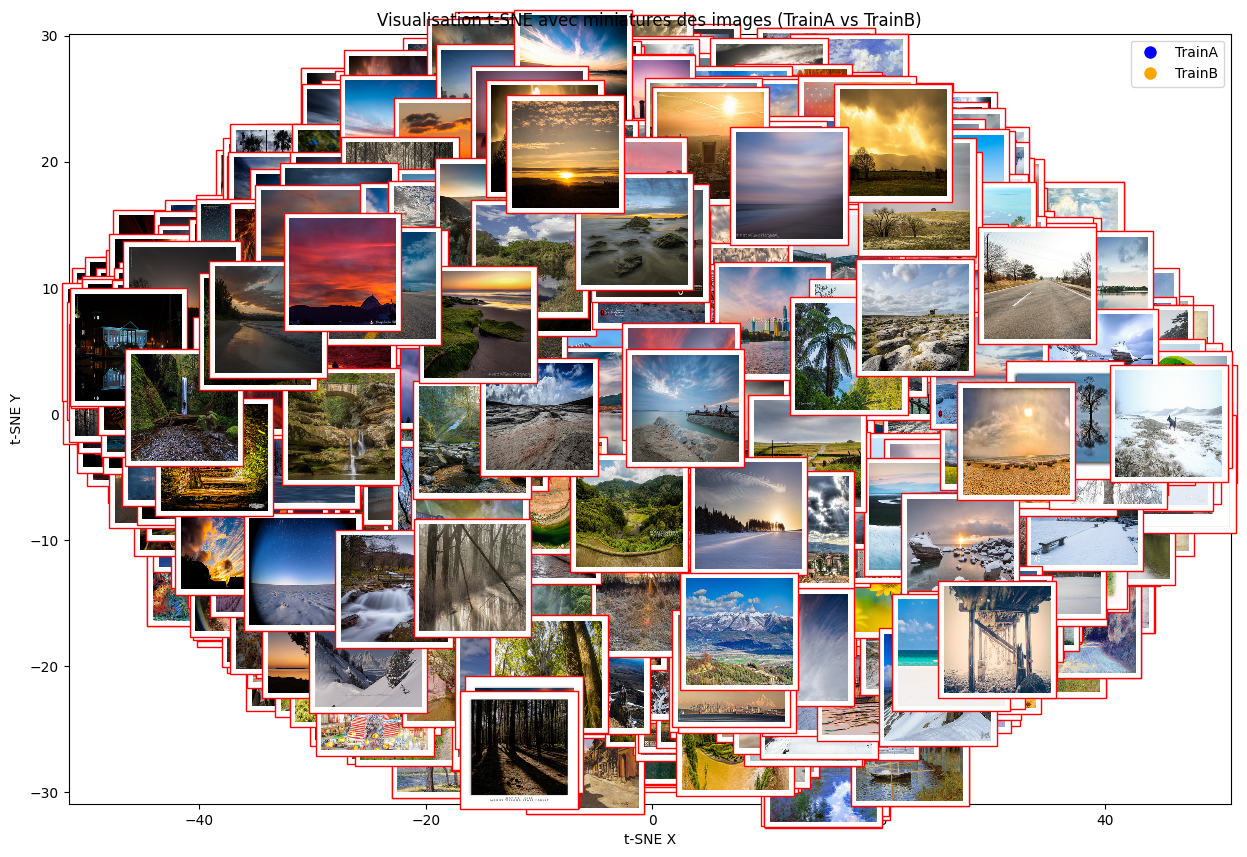

In [56]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner pour réduire la taille
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

# Extraire les coordonnées X et Y
x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Fonction pour ajouter des miniatures d'images aux points t-SNE
def add_offset_images(ax, x, y, image_paths, zoom=0.5):
    for x0, y0, img_path in zip(x, y, image_paths):
        img = Image.open(img_path)  # Ouvrir l'image
        im = OffsetImage(img, zoom=zoom)  # Redimensionner pour l'affichage
        ab = AnnotationBbox(im, (x0, y0), frameon=True, bboxprops=dict(edgecolor='red'))
        ax.add_artist(ab)

# Créer le graphique t-SNE avec des points et des miniatures
fig, ax = plt.subplots(figsize=(15, 10))

# Afficher les points colorés pour chaque classe
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.5, s=10, marker='o')

# Ajouter les miniatures d'images
add_offset_images(ax, x_coords, y_coords, all_paths, zoom=0.3)

# Configurer les légendes et les axes
plt.title("Visualisation t-SNE avec miniatures des images (TrainA vs TrainB)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='TrainA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='TrainB')
], loc='best')

plt.show()


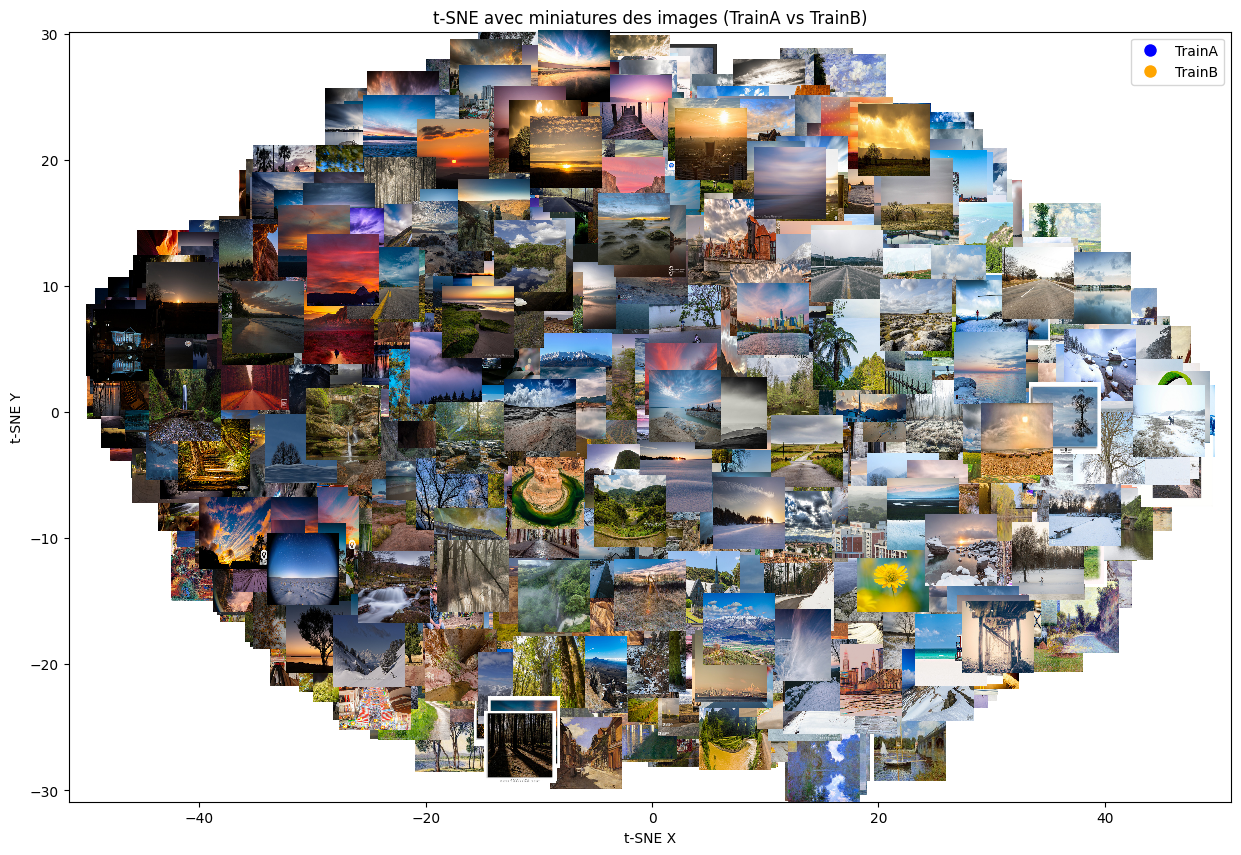

In [57]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Définir les chemins des dossiers contenant les images
trainA_path = "monet2photo/trainA"
trainB_path = "monet2photo/trainB"

# Fonction pour charger les images et les convertir en vecteurs
def load_images_with_paths(image_folder, max_images=1500):
    image_vectors = []
    image_paths = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][:max_images]
    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)
        img = Image.open(img_path).convert("L")  # Convertir en niveaux de gris
        img = img.resize((32, 32))  # Redimensionner pour réduire la taille
        image_vectors.append(np.array(img).flatten())
        image_paths.append(img_path)
    return np.array(image_vectors), image_paths

# Charger les images de TrainA et TrainB
trainA_vectors, trainA_paths = load_images_with_paths(trainA_path)
trainB_vectors, trainB_paths = load_images_with_paths(trainB_path)

# Combiner les données
all_vectors = np.vstack([trainA_vectors, trainB_vectors])
all_paths = trainA_paths + trainB_paths
labels = ['TrainA'] * len(trainA_paths) + ['TrainB'] * len(trainB_paths)

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

x_coords, y_coords = tsne_results[:, 0], tsne_results[:, 1]

# Fonction pour ajouter des miniatures d'images aux points t-SNE
def add_offset_images(ax, x, y, image_paths, zoom=0.2):  # Zoom ajusté pour des images plus petites
    for x0, y0, img_path in zip(x, y, image_paths):
        img = Image.open(img_path)
        im = OffsetImage(img, zoom=zoom)  # Zoom plus petit
        ab = AnnotationBbox(im, (x0, y0), frameon=False)
        ax.add_artist(ab)

# Créer le graphique t-SNE avec des points et des miniatures
fig, ax = plt.subplots(figsize=(15, 10))

# Afficher les points plus visibles
ax.scatter(x_coords, y_coords, c=['blue' if lbl == 'TrainA' else 'orange' for lbl in labels],
           alpha=0.7, s=20, marker='o')  # Taille des points réduite avec s=20

# Ajouter les miniatures d'images avec un zoom plus petit
add_offset_images(ax, x_coords, y_coords, all_paths, zoom=0.2)

# Configurer les légendes et les axes
plt.title("t-SNE avec miniatures des images (TrainA vs TrainB)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='TrainA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='TrainB')
], loc='best')

plt.show()
